In [3]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Read and process total crop area data
ar=pd.read_excel('crop areas.xlsx')
ar=ar.dropna(subset='Crop')
ar=ar[ar['Crop']!='Slåttervall, återväxt'] 
ar=ar[ar['Crop']!='Slåttervall, första skörd']
#cr=cr[cr['Crop']!='Slåttervall, total vallskörd'] # commented to include grasslands
ar=ar[ar['Crop']!='Stråsädesgrödor (exkl. majs) till grönfoder']
ar=ar[ar['Crop']!='Majs till grönfoder']
ar=ar[ar['Crop']!= 'Andra ettåriga grödor till grönfoder']
ar=ar[ar['Crop']!='Spannmål totalt']       # total grains
print(ar['Crop'].unique()) # list of crops considered
ar = ar.drop(ar.columns[1], axis=1)
# Replace '.' and '..' with np.nan
ar.replace(['.', '..'], np.nan, inplace=True)
ar.iloc[:, 1:] = ar.iloc[:, 1:].interpolate(method='linear', axis=1)
ar_tot=pd.pivot_table(ar, index='County', aggfunc=np.nansum).reset_index() # sum of all crop types
ar_tot['County Code'] = ar_tot['County'].str.split(n=1).str[0]
ar_tot['County Code'] = ar_tot['County Code'].astype('int64')

['Höstvete' 'Vårvete' 'Råg' 'Höstkorn' 'Vårkorn' 'Havre' 'Rågvete'
 'Höstrågvete' 'Vårrågvete' 'Blandsäd' 'Majs' 'Ärter' 'Åkerbönor'
 'Höstraps' 'Vårraps' 'Höstrybs' 'Vårrybs' 'Oljelin' 'Matpotatis'
 'Potatis för stärkelse' 'Sockerbetor' 'Slåttervall, total vallskörd']


In [11]:
import numpy as np
import pandas as pd
import os
# Read and process total harvest data
hv=pd.read_excel('total harvest.xlsx')
hv=hv.dropna(subset='Crop')
hv=hv[hv['Crop']!='Slåttervall, återväxt'] 
hv=hv[hv['Crop']!='Slåttervall, första skörd']
#cr=cr[cr['Crop']!='Slåttervall, total vallskörd'] # commented to include grasslands
hv=hv[hv['Crop']!='Stråsädesgrödor (exkl. majs) till grönfoder']
hv=hv[hv['Crop']!='Majs till grönfoder']
hv=hv[hv['Crop']!= 'Andra ettåriga grödor till grönfoder']
hv=hv[hv['Crop']!='Spannmål totalt']       # total grains
print(hv['Crop'].unique()) # list of crops considered
hv = hv.drop(hv.columns[1], axis=1)
# Replace '.' and '..' with np.nan
hv.replace(['.', '..'], np.nan, inplace=True)
hv.iloc[:, 1:] = hv.iloc[:, 1:].interpolate(method='linear', axis=1)
hv_tot=pd.pivot_table(hv, index='County', aggfunc=np.nansum).reset_index() # sum of all crop types
hv_tot['County Code'] = hv_tot['County'].str.split(n=1).str[0]
hv_tot['County Code'] = hv_tot['County Code'].astype('int64')

['Höstvete' 'Vårvete' 'Råg' 'Höstkorn' 'Vårkorn' 'Havre' 'Rågvete'
 'Höstrågvete' 'Vårrågvete' 'Blandsäd' 'Majs' 'Ärter' 'Åkerbönor'
 'Höstraps' 'Vårraps' 'Höstrybs' 'Vårrybs' 'Oljelin' 'Matpotatis'
 'Potatis för stärkelse' 'Sockerbetor' 'Slåttervall, total vallskörd']


In [12]:
# Determine total crop yield as total harvest /  total area
cr_tot = ar_tot.copy()
cr_tot.iloc[:, 1:-1] = hv_tot.iloc[:, 1:-1] / ar_tot.iloc[:, 1:-1] 
cr_tot=cr_tot.replace(0, np.nan)
# Calculate proportional crop yield per municipality
area=pd.read_excel('municipality area pop region.xlsx')
area_mun=area[['Kommunnamn','Landareal i hektar','Länskod']].groupby(['Kommunnamn','Länskod']).agg('sum').reset_index()
area_mun_yield= area_mun.merge(right=cr_tot, left_on='Länskod', right_on='County Code', how='inner')
extra_columns=['Kommunnamn', 'Länskod', 'Landareal i hektar', 'County', 'County Code']
areas_to_multiply=area_mun_yield['Landareal i hektar']
yield_per_hec=area_mun_yield.drop(columns=extra_columns)
yield_mun=yield_per_hec
yield_mun['Municipality']=area_mun_yield['Kommunnamn']
yield_mun_total= yield_mun

In [13]:
yield_mun_total

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Municipality
0,6.270671,5.982143,5.937607,5.535033,5.233690,5.742848,5.217391,5.977096,5.820547,6.827033,7.350721,6.062900,7.604766,5.432323,7.985181,6.993603,6.603289,7.578766,Ale
1,6.270671,5.982143,5.937607,5.535033,5.233690,5.742848,5.217391,5.977096,5.820547,6.827033,7.350721,6.062900,7.604766,5.432323,7.985181,6.993603,6.603289,7.578766,Alingsås
2,6.270671,5.982143,5.937607,5.535033,5.233690,5.742848,5.217391,5.977096,5.820547,6.827033,7.350721,6.062900,7.604766,5.432323,7.985181,6.993603,6.603289,7.578766,Bengtsfors
3,6.270671,5.982143,5.937607,5.535033,5.233690,5.742848,5.217391,5.977096,5.820547,6.827033,7.350721,6.062900,7.604766,5.432323,7.985181,6.993603,6.603289,7.578766,Bollebygd
4,6.270671,5.982143,5.937607,5.535033,5.233690,5.742848,5.217391,5.977096,5.820547,6.827033,7.350721,6.062900,7.604766,5.432323,7.985181,6.993603,6.603289,7.578766,Borås
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,6.402116,5.428571,5.803109,6.822917,6.492537,5.807560,5.874126,7.459283,6.633663,7.259475,7.774648,7.097561,7.195467,4.624506,7.552083,7.703488,6.463104,7.738854,Karlshamn
286,6.402116,5.428571,5.803109,6.822917,6.492537,5.807560,5.874126,7.459283,6.633663,7.259475,7.774648,7.097561,7.195467,4.624506,7.552083,7.703488,6.463104,7.738854,Karlskrona
287,6.402116,5.428571,5.803109,6.822917,6.492537,5.807560,5.874126,7.459283,6.633663,7.259475,7.774648,7.097561,7.195467,4.624506,7.552083,7.703488,6.463104,7.738854,Olofström
288,6.402116,5.428571,5.803109,6.822917,6.492537,5.807560,5.874126,7.459283,6.633663,7.259475,7.774648,7.097561,7.195467,4.624506,7.552083,7.703488,6.463104,7.738854,Ronneby


In [14]:
# Derive streamflow data
import pandas as pd
import geopandas as gpd
import numpy as np
import os
from shapely.geometry import Point
# Modelled locations
dis_locs=pd.read_excel('discharge_stations.xlsx')
# Define the file paths for the shapefiles
# Get the current file directory (where the notebook is running)
current_dir = os.getcwd()
# Navigate to the root of the repository (adjust based on your directory structure)
repo_root = os.path.abspath(os.path.join(current_dir, '..'))  # Or adjust the number of ".." as needed
# Define the paths dynamically
shapefiles_path = os.path.join(repo_root, "Hazard data", "shapefiles")
kommun_file = os.path.join(shapefiles_path,'Kommun_Sweref99TM_region.shp')
# Read the shapefiles using geopandas
kommun_shapefile = gpd.read_file(kommun_file)
kommun_shapefile = kommun_shapefile.to_crs("EPSG:4326")
# Convert 'dis_locs' to a GeoDataFrame with Point geometries
geometry = [Point(xy) for xy in zip(dis_locs['longitude'], dis_locs['latitude'])]
dis_locs_gdf = gpd.GeoDataFrame(dis_locs, geometry=geometry, crs='EPSG:4326')
# Perform a spatial join to find the municipality names
dis_locs_mun = gpd.sjoin(dis_locs_gdf, kommun_shapefile, how='left', op='within')


In [15]:
# Read daily stramflow data and convert to annual streamflow
# Function to reindex and temporally interpolate missing data for each station
def reindex_and_interpolate(dis_st, start_date, end_date):
    # Create a complete date range from start_date to end_date
    full_date_range = pd.date_range(start=start_date, end=end_date, closed='left')
    # Reindex the DataFrame to include the full date range
    dis_st = dis_st.set_index('date').reindex(full_date_range).rename_axis('date')
    # Interpolate the missing values
    dis_st['value'] = dis_st['value'].interpolate(method='linear')
    return dis_st
# Please find the discharge_data.csv at 10.6084/m9.figshare.28100255
dis_day=pd.read_csv('discharge_data.csv')
dis_day['date']=pd.to_datetime(dis_day['date'])
start_date='2005-01-01'
end_date='2022-12-31'
dis_day=dis_day[dis_day['date']>=start_date]
dis_day=dis_day[dis_day['date']<=end_date]
# Merge Municipality names to discharge data
dis_day_mun = pd.merge(dis_day, dis_locs_mun, left_on='station_id', right_on='id', how='inner')
monthly_counts = dis_day.groupby(['station_id', pd.Grouper(key='date', freq='M')])['date'].count().reset_index(name='Count')
pivot_table = monthly_counts.pivot_table(index='station_id', columns='date', values='Count', fill_value=0)
stations_with_complete_data = pivot_table[(pivot_table > 0).all(axis=1)]
# Get the list of stations with complete data (at least one measurement per month for all years)
complete_stations = stations_with_complete_data.index.tolist()
dis_sts = pd.DataFrame()
for station in complete_stations:
    dis_st=dis_day_mun[dis_day_mun.station_id==station]
    dis_st=dis_st.sort_values('date')
    duration=dis_st['date'].iloc[-1]-dis_st['date'].iloc[0]
    dis_st['duration']=duration.days/365.25
    lat=dis_st['latitude'].iloc[0]
    lon=dis_st['longitude'].iloc[0]
    mun=dis_st['KnNamn'].iloc[0]
    if duration.days/365.25>=17: # Only consider stations with complete data
        dis_st_int=reindex_and_interpolate(dis_st, start_date, end_date)
        dis_st_yr=dis_st_int.resample('Y').mean().reset_index() # mean annual discharges
        dis_st_yr['latitude']=lat
        dis_st_yr['longitude']=lon
        dis_st_yr['station_id']=station
        dis_st_yr['Municipality']=mun
        dis_sts=dis_sts.append(dis_st_yr)
# Group by municipality and resample each group to yearly mean
dis= dis_sts.groupby(['Municipality','date']).mean().reset_index()
dis=dis[['Municipality','value','date']]
dis.columns=['Municipality','Value','Time']
dis['Time']=dis['Time'].dt.year

In [16]:
dis

,Municipality,Value,Time
0,Alingsås,14.305785,2005
1,Alingsås,18.257534,2006
2,Alingsås,19.567123,2007
3,Alingsås,21.601093,2008
4,Alingsås,11.081554,2009
...,...,...,...
2227,Övertorneå,3.953226,2018
2228,Övertorneå,4.466489,2019
2229,Övertorneå,7.908688,2020
2230,Övertorneå,6.547501,2021


In [17]:
# Hydropower electricity production
hydro_prod=pd.read_excel('el_prod_hydro.xlsx').dropna()
hydro_prod=hydro_prod.replace('..', pd.NA)
hydro_prod.iloc[:, 1:] = hydro_prod.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
hydro_prod.iloc[:, 1:] = hydro_prod.iloc[:, 1:].interpolate(method='linear', axis=1)
hydro_prod['Municipality'] = hydro_prod['Municipality'].str.split(n=1).str[1]

In [18]:
hydro_prod

,Municipality,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Upplands Väsby,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Vallentuna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Österåker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Värmdö,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Järfälla,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,Luleå,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286,Piteå,172350.0,184211.0,236021.0,204560.0,186573.0,223785.0,273304.0,167250.0,144271.0,166157.0,188043.0,209929.0,231815.0,136512.0,200817.0,223179.0,207673.0,221366.0
287,Boden,1777889.0,951169.0,1586178.0,1820231.0,1419797.0,1435549.0,1506834.0,1743232.0,1624652.0,1421803.0,1527898.0,1618097.0,1636655.0,1578138.0,1577339.0,1683037.0,1788735.0,1841762.0
288,Haparanda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Merge all impact data
variables=['crop_yield_total',
          'hydro_prod']
df_list= [yield_mun_total, 
         hydro_prod]
dfs=[]
for N, variable in enumerate(variables):
    df = df_list[N]
    df['Variable'] = variable
    dfs.append(df)
#Combine DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
# Reshape the DataFrame using melt
melted_df = pd.melt(combined_df, id_vars=['Variable', 'Municipality'], var_name='Time', value_name='Value')
# Add data in different format
dis['Variable'] ='discharge'
merged_df = pd.concat([melted_df, dis], ignore_index=True)
# Print the melted DataFrame
print(merged_df)
merged_df['Municipality']=merged_df['Municipality'].replace('Upplands-Väsby','Upplands Väsby').replace('Malung-Sälen','Malung')
results_df= merged_df.dropna(subset='Value')

               Variable Municipality  Time     Value
0      crop_yield_total          Ale  2005  6.270671
1      crop_yield_total     Alingsås  2005  6.270671
2      crop_yield_total   Bengtsfors  2005  6.270671
3      crop_yield_total    Bollebygd  2005  6.270671
4      crop_yield_total        Borås  2005  6.270671
...                 ...          ...   ...       ...
12667         discharge   Övertorneå  2018  3.953226
12668         discharge   Övertorneå  2019  4.466489
12669         discharge   Övertorneå  2020  7.908688
12670         discharge   Övertorneå  2021  6.547501
12671         discharge   Övertorneå  2022  4.407062

[12672 rows x 4 columns]


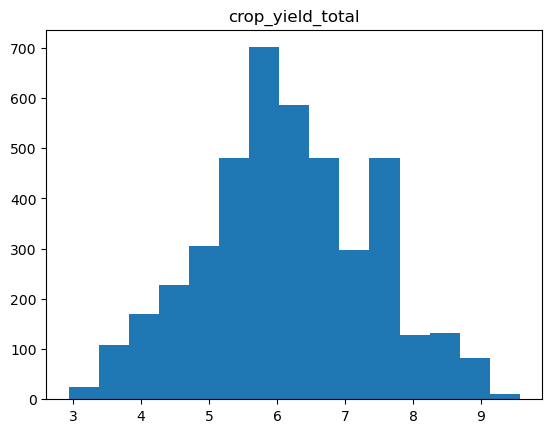

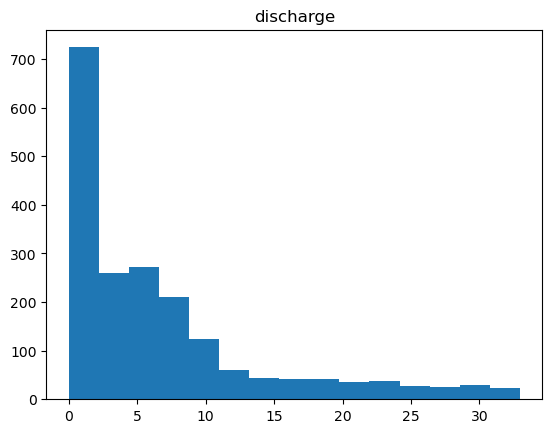

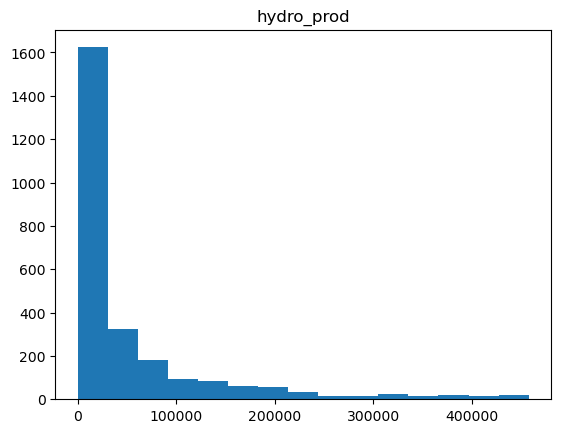

In [21]:
# Check all data before saving
import matplotlib.pyplot as plt
variables=['crop_yield_total','discharge', 'hydro_prod']
filtered_final=pd.DataFrame()
for variable in variables:
    data_check=merged_df[merged_df['Variable']==variable]
    data_check[data_check['Value']==0]=np.nan
    data_check=data_check.dropna(subset='Value')
     # Remove outliers
    Q1 = data_check['Value'].quantile(0.25)
    Q3 = data_check['Value'].quantile(0.75)
    IQR = Q3 - Q1
    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out outliers
    data_check = data_check[(data_check['Value'] >= lower_bound) & (data_check['Value'] <= upper_bound)]
    fig, ax = plt.subplots()
    ax.hist(data_check['Value'], bins=15)
    ax.set_title(variable)
    filtered_final=filtered_final.append(data_check)
results_df.to_csv('Merged_impacts.csv', index=False) # Save merged data